## Fit the model/algorithm to the data and use it to make predictions 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Fit the model to the data

In [2]:
heart_disease = pd.read_csv("../data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Split the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [4]:
# Let's use RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

# Evaluate the model
rfc.score(X_test, y_test)

0.8524590163934426

If you'd like to learn more about the Random Forest and why it's the war horse of machine learning, check out these resources:

- [Random Forest Wikipedia](https://en.wikipedia.org/wiki/Random_forest)
- [Random Forests in Python by yhat](http://blog.yhat.com/posts/random-forests-in-python.html)
- [An Implementation and Explanation of the Random Forest in Python by Will Koehrsen](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76)

### 2. Make predictions using machine learning model

2 ways to make predictions
- `predict()`
- `predict_proba()`

In [5]:
# Compare predictions to truth labels to evaluate the model
y_preds = rfc.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [6]:
rfc.score(X_test, y_test)

0.8524590163934426

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

In [8]:
# make predictions using predict_proba
# it returns a probability  of classification labels
rfc.predict_proba(X_test)[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [9]:
rfc.predict(X_test)[:5]

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models

In [10]:
from sklearn.datasets import load_boston
boston_data = load_boston()
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [11]:
boston_df = pd.DataFrame(boston_data["data"],
                         columns=boston_data["feature_names"])
boston_df["target"] = pd.Series(boston_data["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
# Split the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# setup random seed
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

# Evaluate the model
rfr.score(X_test, y_test)

0.8654448653350507

In [14]:
y_preds = rfr.predict(X_test)
y_preds[:5]

array([23.081, 30.574, 16.759, 23.46 , 16.893])

[Formula](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.score)

In [15]:
# Compare the predictions to the truth
from sklearn.metrics import mean_squared_error

u = mean_squared_error(y_test, y_preds)
mean_array = np.empty_like(y_test)
mean_array.fill(y_test.mean())
v = mean_squared_error(y_test, mean_array)
print(1 - u/v)

0.8654448653350507


### 3. Evaluating a machine learning model

3 ways to evaluate Scikit-Learn  models/estimators
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions
    
#### 3.1 Evaluating a model with the score method   

In [16]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfc = RandomForestClassifier().fit(X_train, y_train)


In [17]:
rfc.score(X_train, y_train)

1.0

In [18]:
rfc.score(X_test, y_test)

0.8524590163934426

In [19]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rfr = RandomForestRegressor().fit(X_train, y_train)


In [20]:
rfr.score(X_train, y_train)

0.9763520974033731

In [21]:
rfr.score(X_test, y_test)

0.8654448653350507

**Remember, even if both models are using the same `score` function, they are using different formulas underlying.**

#### 3.2 Evaluating a model with the `scoring` paramter

In [22]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier().fit(X_train, y_train)

In [23]:
clf.score(X_test, y_test)

0.8524590163934426

In [26]:
# remember we call cross_val_score on original X an y
# we do not need to split the data
# default is 5-fold validation
cross_val_score(clf, X, y)

array([0.81967213, 0.90163934, 0.80327869, 0.81666667, 0.75      ])

In [27]:
cross_val_score(clf, X, y, cv=10)

array([0.90322581, 0.83870968, 0.83870968, 0.9       , 0.83333333,
       0.86666667, 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [29]:
np.random.seed(42)

# Single training and test split score
single_split_score = clf.score(X_test, y_test)

# Mean of 5-fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
single_split_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [30]:
# scoring parameter is set to none by default
# it then uses default evaluation metric of the classifier
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
accuracy = cross_val_score(clf, X, y, cv=5)
print(f"Heart Disease Classifier Accuracy {np.mean(accuracy)*100:.2f} %")

Heart Disease Classifier Accuracy 82.48 %


**Area under the receiver operating characteristic curve (AUC/ROC)**
- Area under curve (AUC)
- ROC curve

ROC curves are a comparison of a model's true positive rate (tpr) versus a model's false positive rate (fpr).

* True positive = model predicts 1 when real label is 1
* False positive = model predicts 1 when real label is 0
* True nefative = model predicts 0 when real label is 0
* False nefative = model predicts 1 when real label is 0


In [38]:
from sklearn.metrics import roc_curve

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.94, 0.06],
       [0.42, 0.58],
       [0.16, 0.84],
       [0.5 , 0.5 ],
       [0.25, 0.75],
       [0.24, 0.76],
       [0.32, 0.68],
       [0.07, 0.93],
       [0.99, 0.01],
       [0.  , 1.  ]])

In [39]:
y_probs_positives = y_probs[:, 1]
y_probs_positives[:10]

array([0.06, 0.58, 0.84, 0.5 , 0.75, 0.76, 0.68, 0.93, 0.01, 1.  ])

In [41]:
# calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positives)

# Check the fpr
fpr

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.04, 0.04, 0.08, 0.12, 0.12,
       0.12, 0.12, 0.6 , 0.64, 0.76, 0.88, 0.96, 1.  ])

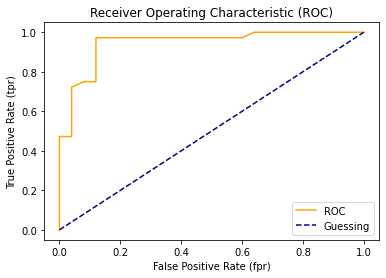

In [43]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots ROC given the false positive rate (fpr) and true positive rate(tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC)")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [45]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positives)

0.9444444444444445

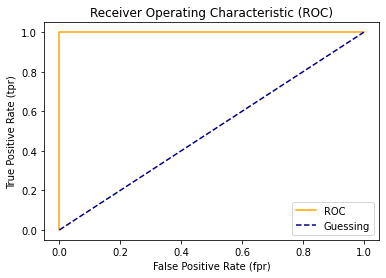

In [46]:
# Plot perfect ROC curve and AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [47]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

### ROC Curve + AUC

When you first encounter them, ROC Curve and AUC (area under curve) metrics can be a little confusing. But not to worry, with a little practice, they'll start to make sense.

In a nutshell, what you should remember is:

* ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

* The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

* The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

For more information on these metrics, bookmark the following resources and refer to them when you need:

1. [ROC and AUC, Clearly Explained! by StatQuest](https://www.youtube.com/watch?v=4jRBRDbJemM)

2. [ROC documentation in Scikit-Learn (contains code examples)](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)

3. [How the ROC curve and AUC are calculated by Google's Machine Learning team](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)